# 10 Grafiken zur Vorschau auf die Bundesliga

**1 Graph of total market value of the Bundesliga**

**5 Graphs on players **

- Graphs of new vs. old players. (1) Games, (2) Age, (3) Goals, (4) Assists, (5) Height.

** 2 Graphs on Shoes **

- Graph by number of games of transfers
- Graph of number of goals scored

**2 Graphs on Most Active Agents **

- Graph by amount of players
- Graph by amount of player value

Source: www.transfermarkt.com

# Imports

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

plt.style.use('ggplot')
import dateutil.parser
import re
import time

%matplotlib inline
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
datestring = time.strftime("%m-%h-%d")
datestring

'07-Jul-26'

# Functions for Scraper

In [2]:
#Function to pick every other player, as the scraper receives duplicates
def removing_every_other_player(x):
    return x[::2]

In [3]:
#Functions for visiting players profil page. Problem was, that the test pages I used, 
#didn't correspond to the ones I was then scraping. The used the language compile selection,
#with English phrases. But the Phrases I should have been using, should have been in German.
#And the there were things like 'Grösse'with a German double S.
def alter(player):
    try:
        return int(player.find('th', text = re.compile('Alter:')).findNext('td').string)
    except:
        return None

In [4]:
def im_team_seit(player):
    try:
        return player.find('th', text = re.compile('Im Team seit:')).findNext('td').string.strip()
    except:
        return None

In [5]:
def groesse(player):
    try:
        return int(player.find('th', text = re.compile('Größe:')).findNext('td').string.replace(',', '').replace(' m', ''))
    except:
        return None

In [6]:
def position(player):
    if player == None:
        return None
    else:
        return player.find('th', text = re.compile('Position:'))\
    .findNext('td').string.strip()

In [7]:
def club(player):
    if player.find('th', text = re.compile('Aktueller Verein:')).string.strip() == 'Aktueller Verein:':
        return player.find('th', text = re.compile('Aktueller')).findNext('td').findNext('a').find('img').get('alt')
    elif player.find('th', text = re.compile('Current club:')).string.strip() == 'Current club:':
        return player.find('th', text = re.compile('Current club:')).findNext('td').findNext('a').find('img').get('alt')
    else:
        return 

In [8]:
#Function to extract the player's earlier club
def ex_club(player):
    try:
        return player.find('td', {'class': 'hauptlink no-border-links hide-for-small vereinsname'}).findNext('a').string
    except:
        return None

In [9]:
def agent(player):
    try:
        return player.find('th', text = re.compile("Spielerberater:"))\
    .findNext('td').findNext('a').get('title')
    except:
        return None

In [10]:
def shoes(player):
    try:
        return player.find('th', text = re.compile("Ausrüster:")).findNext('td')\
    .findNext('a').findNext('img').get('title')
    except:
        return None

In [11]:
def marktwert(player):
    try:
        return player.find('div', {'class': 'right-td'}).findNext('a').text.replace(',', '').replace(' Mio. €', '0000').replace(' Tsd. €', '0000')
    except:
        return None

In [12]:
def ausgeliehen_von(player):
    try:
        return player.find('th', text = re.compile("Ausgeliehen von:")).findNext('td').find('a').text
    except:
        return None

In [13]:
def Minuten(x):
    try:
        return int(x.find('td', {'class': 'zentriert'}).find_next('td', {'class': 'rechts'}).string.replace("'", ''))
    except:
        return None

In [14]:
#Changing Pandas Age to int
def Age_to_int(x):
    try:
        return int(x)
    except:
        return None

# Happy Scraping

In [15]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}

In [16]:
#url = "http://www.transfermarkt.com/raiffeisen-super-league/transfers/wettbewerb/C1/saison_id/2016"
url = "http://www.transfermarkt.de/1-bundesliga/transfers/wettbewerb/L1"
response = requests.get(url, headers=headers)
transfermarkt_soup = BeautifulSoup(response.text, 'html.parser')

In [17]:
transfermarkt = transfermarkt_soup.find_all('a', {'class': 'spielprofil_tooltip'})

In [18]:
#not sure why this playing starts the scraped list. Keep an eye on this
transfermarkt.pop(0)
#Only picking every other player
transfermarkt = removing_every_other_player(transfermarkt)

In [19]:
transfer_dict = []

for spieler in transfermarkt:
    
    #Name
    Name = spieler.string
    print(Name)
    
    #Link
    spieler_link = spieler['href']
    spieler_link = 'http://www.transfermarkt.ch' + spieler_link
    #print(spieler_link)
    
    #Visiting players profil pages
    spieler_profil = requests.get(spieler_link, headers=headers)
    spieler_profil = BeautifulSoup(spieler_profil.text, 'html.parser')
    #print(spieler_profil)
    
    Alter = alter(spieler_profil)
    #print(Alter)
    Grösse = groesse(spieler_profil)
    #print(Grösse)
    Position = position(spieler_profil)
    #print(Position)
    Verein = club(spieler_profil)
    #print(Verein)
    Ex_Verein = ex_club(spieler_profil)
    #print(Ex_Verein)
    Agent = agent(spieler_profil)
    #print(Agent)
    Ausrüster = shoes(spieler_profil)
    #print(Ausrüster)
    Im_team_seit = im_team_seit(spieler_profil)
    #print(Im_team_seit)
    Marktwert = marktwert(spieler_profil)
    Ausgeliehen_von = ausgeliehen_von(spieler_profil)
    #print(Marktwert)
    #print(Marktwert)
    
    #Visiting Leistungsdaten pages
    spieler_leistungsdaten_link = spieler_link.replace('profil', 'leistungsdaten')
    spieler_leistungsdaten_link = spieler_leistungsdaten_link + '/plus/0?saison=ges'
    spieler_leistungsdaten = requests.get(spieler_leistungsdaten_link, headers=headers)
    spieler_leistungsdaten = BeautifulSoup(spieler_leistungsdaten.text, 'html.parser')
    print(spieler_leistungsdaten_link)
    
    #This is okay to do in a list, as every footballer has these parameters. for the Bundesliga
    #I had to accomodate that some players have no data on their performance.
    try: 
        Spiele = spieler_leistungsdaten.find('tfoot')
        leistungsdaten = Spiele.find_all('td', {'class': 'zentriert'})
        leistungsdaten_list = []
        for Daten in leistungsdaten:
            Daten = Daten.string
            leistungsdaten_list.append(Daten)
    
        if len(leistungsdaten_list) > 6:
            Totalspiele = int(leistungsdaten_list[0].replace('-', '0'))
            Tore = int(leistungsdaten_list[1].replace('-', '0'))
            Vorlagen = 0
            Gelbe_Karten = int(leistungsdaten_list[2].replace('-', '0'))
            Gelb_Rote_Karten = int(leistungsdaten_list[3].replace('-', '0'))
            Rote_Karten = int(leistungsdaten_list[4].replace('-', '0'))
    
        else:
            Totalspiele = int(leistungsdaten_list[0].replace('-', '0'))
            Tore = int(leistungsdaten_list[1].replace('-', '0'))
            Vorlagen = int(leistungsdaten_list[2].replace('-', '0'))
            Gelbe_Karten = int(leistungsdaten_list[3].replace('-', '0'))
            Gelb_Rote_Karten = int(leistungsdaten_list[4].replace('-', '0'))
            Rote_Karten = int(leistungsdaten_list[5].replace('-', '0'))
    except:
        None
        #print(leistungsdaten_list)
    
    #Minuten = Minuten(Spiele)
    
    Spieler_Dict = {"Name": Name,
                    "Alter": Alter,
                    "URL": spieler_link,
                    "Grösse": Grösse,
                    "Position": Position,
                    "Verein": Verein,
                    "Wechsel von": Ex_Verein,
                    "Ausgeliehen von": Ausgeliehen_von,
                    "Agent": Agent,
                    "Ausrüster": Ausrüster,
                    "Im Team seit": Im_team_seit,
                    "Total Spiele": Totalspiele,
                    "Tore": Tore,
                    "Vorlagen": Vorlagen,
                    "Gelbe Karten": Gelbe_Karten,
                    "Gelb-Rote Karten": Gelb_Rote_Karten,
                    "Rote Karten": Rote_Karten,
                    'Marktwert': Marktwert,
                    'Minuten': Minuten
                    }
    
    transfer_dict.append(Spieler_Dict)

Mats Hummels
http://www.transfermarkt.ch/mats-hummels/leistungsdaten/spieler/39728/plus/0?saison=ges
Renato Sanches
http://www.transfermarkt.ch/renato-sanches/leistungsdaten/spieler/258027/plus/0?saison=ges
Niklas Dorsch
http://www.transfermarkt.ch/niklas-dorsch/leistungsdaten/spieler/251302/plus/0?saison=ges
Fabian Benko
http://www.transfermarkt.ch/fabian-benko/leistungsdaten/spieler/337027/plus/0?saison=ges
Pierre-Emile Höjbjerg
http://www.transfermarkt.ch/pierre-emile-hojbjerg/leistungsdaten/spieler/167799/plus/0?saison=ges
Mario Götze
http://www.transfermarkt.ch/mario-gotze/leistungsdaten/spieler/74842/plus/0?saison=ges
Pierre-Emile Höjbjerg
http://www.transfermarkt.ch/pierre-emile-hojbjerg/leistungsdaten/spieler/167799/plus/0?saison=ges
Sebastian Rode
http://www.transfermarkt.ch/sebastian-rode/leistungsdaten/spieler/44466/plus/0?saison=ges
Medhi Benatia
http://www.transfermarkt.ch/medhi-benatia/leistungsdaten/spieler/45124/plus/0?saison=ges
Ivan Lucic
http://www.transfermarkt.ch/i

# Creating and prepping the Dataframe

In [20]:
#Making the DataFrame
df_transfers = pd.DataFrame(transfer_dict)

In [21]:
df_transfers.head(1)

,Agent,Alter,Ausgeliehen von,Ausrüster,Gelb-Rote Karten,Gelbe Karten,Grösse,Im Team seit,Marktwert,Minuten,Name,Position,Rote Karten,Tore,Total Spiele,URL,Verein,Vorlagen,Wechsel von
0,HMH Sportmanagement,27,None,adidas ACE 16.1 Primeknit FG,0,41,192.0,01.07.2016,,<function Minuten at 0x10d8660d0>,Mats Hummels,Abwehr - Innenverteidiger,1,38,386,http://www.transfermarkt.ch/mats-hummels/profi...,FC Bayern München,16,Bor. Dortmund


In [22]:
#Dealing with the loan problem. Sorting out only the loaned players. Moving column to the back. 
#Deleting last club column. Renaming the loaned column. Then concating it with the original file.
#So now the last club column is correct. 
df_ausgeliehen = df_transfers[df_transfers['Ausgeliehen von'].notnull()]

def change_column_order(df, col_name, index):
    cols = df.columns.tolist()
    cols.remove(col_name)
    cols.insert(index, col_name)
    return df[cols]

#moving column to the back
df = change_column_order(df_ausgeliehen, 'Ausgeliehen von', 17)

del df['Wechsel von']

#Renaming last column
df.columns = df.columns.str.replace('Ausgeliehen von','Wechsel von')

#Prepping original dataframe
df_transfers = df_transfers[df_transfers['Ausgeliehen von'].isnull()]

del df_transfers['Ausgeliehen von']

#concating the two
df_SL_transfers = pd.concat([df, df_transfers], ignore_index=True)

#Dropping any duplicate values
df_SL_transfers = df_SL_transfers.drop_duplicates()

In [23]:
#df_SL_transfers[df_SL_transfers['Verein'] == 'VfL Wolfsburg']

In [24]:
###### Making sure all the clubs are spelt correctly:

#Bayern München
#Bor. Dortmund
#VfL Wolfsburg
#Bay. Leverkusen
#1.FSV Mainz 05*
#TSG Hoffenheim*
#SC Freiburg*
#FC Ingolstadt 04*
#RB Leipzig
#Hertha BSC
#Bor. M'gladbach
#Hamburger SV
#FC Schalke 04*
#E. Frankfurt
#FC Augsburg
#SV Werder Bremen*
#TSG 1899 Hoffenheim*
#1.FC Köln

#FC Bayern München
#Borussia Dortmund
#VfL Wolfsburg
#Bayer 04 Leverkusen
#1.FSV Mainz 05
#TSG Hoffenheim
#SC Freiburg
#FC Ingolstadt 04
#RasenBallsport Leipzig
#Hertha BSC
#Borussia Mönchengladbach
#Hamburger SV
#FC Schalke 04
#Eintracht Frankfurt
#FC Augsburg
#SV Werder Bremen
#TSG 1899 Hoffenheim
#1.FC Köln

def correct_names(x):
    return x.replace('Bayern München', 'FC Bayern München').replace('Bor. Dortmund',\
                    'Borussia Dortmund').replace('Bay. Leverkusen', 'Bayer 04 Leverkusen')\
                    .replace('RB Leipzig', 'RasenBallsport Leipzig').replace("Bor. M'gladbach",\
                    'Borussia Mönchengladbach').replace('E. Frankfurt', 'Eintracht Frankfurt')


df_SL_transfers['*Wechsel von*'] = df_SL_transfers['Wechsel von'].apply(correct_names)
#df_SL_transfers['*Verein*'] = df_SL_transfers['Verein'].apply(fcb)

In [25]:
df_SL_transfers.describe()

/usr/local/lib/python3.5/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Alter,Gelb-Rote Karten,Gelbe Karten,Grösse,Rote Karten,Tore,Total Spiele,Vorlagen
count,264.000000,264.000000,264.000000,260.000000,264.000000,264.000000,264.000000,264.000000
mean,23.598485,0.621212,19.965909,183.580769,0.681818,25.761364,163.291667,13.511364
std,4.526827,1.053910,16.909364,6.530387,1.080897,33.138491,98.798765,15.579548
min,17.000000,0.000000,0.000000,168.000000,0.000000,0.000000,6.000000,0.000000
25%,20.000000,0.000000,6.000000,NaN,0.000000,3.000000,90.000000,1.000000
50%,23.000000,0.000000,16.000000,NaN,0.000000,15.000000,152.500000,8.500000
75%,26.000000,1.000000,28.000000,NaN,1.000000,33.250000,226.500000,20.250000
max,39.000000,7.000000,80.000000,199.000000,8.000000,212.000000,550.000000,91.000000


# Interesting facts and figures

In [26]:
#Top, most active agents:
df_SL_transfers['Agent'].value_counts().head()

arena11 sports group                   16
ROGON Sportmanagement GmbH & Co. KG    14
Familienangehöriger                    14
SportsTotal                            14
PRO Profil GmbH                        10
Name: Agent, dtype: int64

In [27]:
#Which shoes are they playing with?
df_SL_transfers['Ausrüster'].value_counts().head(10)

Nike Magista Obra FG - Spark Brilliance             20
Nike Tiempo Legend VI FG - Spark Brilliance         20
Nike Mercurial Vapor XI FG - Spark Brilliance       20
adidas X 16.1 FG                                    19
adidas ACE 16.1 Primeknit FG                        18
Nike Mercurial Superfly V FG - Spark Brilliance     17
Nike Magista Opus FG - Spark Brilliance             10
Nike Hypervenom Phantom II FG - Spark Brilliance     6
Nike Hypervenom Phinish II FG - Spark Brilliance     5
Nike Mercurial Superfly FG - Radiant Reveal          2
Name: Ausrüster, dtype: int64

In [28]:
df_SL_transfers['Rote Karten'].sort_values(ascending=False).head(3)

143    8
230    5
137    5
Name: Rote Karten, dtype: int64

In [29]:
df_SL_transfers[df_SL_transfers['Rote Karten'] == 8] 

,Agent,Alter,Ausrüster,Gelb-Rote Karten,Gelbe Karten,Grösse,Im Team seit,Marktwert,Minuten,Name,Position,Rote Karten,Tore,Total Spiele,URL,Verein,Vorlagen,Wechsel von,*Wechsel von*
143,arena11 sports group,31,None,0,60,188.0,01.07.2016,,<function Minuten at 0x10d8660d0>,Vedad Ibisevic,Sturm - Mittelstürmer,8,139,366,http://www.transfermarkt.ch/vedad-ibisevic/pro...,Hertha BSC,48,VfB Stuttgart,VfB Stuttgart


In [30]:
df_SL_transfers['Alle Karten'] = df_SL_transfers['Gelbe Karten'] + df_SL_transfers['Rote Karten'] + df_SL_transfers['Gelb-Rote Karten']
df_SL_transfers['Alle Karten'].sort_values(ascending=False).head(3)

102    89
290    83
0      72
Name: Alle Karten, dtype: int64

In [31]:
df_SL_transfers[df_SL_transfers['Alle Karten'] == 89]

,Agent,Alter,Ausrüster,Gelb-Rote Karten,Gelbe Karten,Grösse,Im Team seit,Marktwert,Minuten,Name,Position,Rote Karten,Tore,Total Spiele,URL,Verein,Vorlagen,Wechsel von,*Wechsel von*,Alle Karten
102,GRASS IS GREEN THOMAS BÖHM SPORTS MANAGEMENT GmbH,36,adidas ACE 16.1 Primeknit FG,4,80,190.0,01.07.2016,,<function Minuten at 0x10d8660d0>,Martin Stranzl,Abwehr - Innenverteidiger,5,23,468,http://www.transfermarkt.ch/martin-stranzl/pro...,Karriereende,16,Bor. M'gladbach,Borussia Mönchengladbach,89


In [32]:
df_SL_transfers.describe()

/usr/local/lib/python3.5/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Alter,Gelb-Rote Karten,Gelbe Karten,Grösse,Rote Karten,Tore,Total Spiele,Vorlagen,Alle Karten
count,264.000000,264.000000,264.000000,260.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,23.598485,0.621212,19.965909,183.580769,0.681818,25.761364,163.291667,13.511364,21.268939
std,4.526827,1.053910,16.909364,6.530387,1.080897,33.138491,98.798765,15.579548,18.090594
min,17.000000,0.000000,0.000000,168.000000,0.000000,0.000000,6.000000,0.000000,0.000000
25%,20.000000,0.000000,6.000000,NaN,0.000000,3.000000,90.000000,1.000000,6.000000
50%,23.000000,0.000000,16.000000,NaN,0.000000,15.000000,152.500000,8.500000,17.000000
75%,26.000000,1.000000,28.000000,NaN,1.000000,33.250000,226.500000,20.250000,30.000000
max,39.000000,7.000000,80.000000,199.000000,8.000000,212.000000,550.000000,91.000000,89.000000


# Creating Dataframes to establish gain, losses of each club

In [33]:
df_SL_Vereine = pd.read_csv("BL_Vereine_16_17.csv")

In [34]:
#FOR THE GAMES
#Merging the Files
df_SL_Zuzuege = df_SL_transfers.merge(df_SL_Vereine, left_on = 'Verein', right_on ='BL-Verein') 
df_SL_Abgänge = df_SL_transfers.merge(df_SL_Vereine, left_on = '*Wechsel von*', right_on ='BL-Verein')
#Working out totals of bought players
Total_Minuten_Zuzüge = pd.DataFrame(df_SL_Zuzuege.groupby('Verein')['Total Spiele'].sum())
#Working out totals of sold players
Total_Minuten_Abgänge = pd.DataFrame(df_SL_Abgänge.groupby('*Wechsel von*')['Total Spiele'].sum())
#Resetting the Index of both the new frames
Total_Minuten_Abgänge.reset_index(inplace=True)
Total_Minuten_Zuzüge.reset_index(inplace=True)
#Merging the data sets
Zuzüge_Abgänge = Total_Minuten_Zuzüge.merge(Total_Minuten_Abgänge, left_on = 'Verein', right_on ='*Wechsel von*') 
#Working out the difference
Zuzüge_Abgänge['Transfer_Differenz_Spiele'] = Zuzüge_Abgänge['Total Spiele_x'] - Zuzüge_Abgänge['Total Spiele_y']

In [35]:
#Deleting the columns we don't need:
del Zuzüge_Abgänge['*Wechsel von*']

In [36]:
#Renaming columns
Zuzüge_Abgänge.columns = ['Verein', 'Total Spiele Zuzüge', 'Total Spiele Abgänge', 'Total-Spiel-Differenz']

In [37]:
#FOR THE GOALS
Total_goals_Zuzüge = pd.DataFrame(df_SL_Zuzuege.groupby('Verein')['Tore'].sum())
Total_goals_Abgänge = pd.DataFrame(df_SL_Abgänge.groupby('*Wechsel von*')['Tore'].sum())
Total_goals_Abgänge.reset_index(inplace=True)
Total_goals_Zuzüge.reset_index(inplace=True)
Tore = Total_goals_Zuzüge.merge(Total_goals_Abgänge, left_on = 'Verein', right_on ='*Wechsel von*')
Tore['Transfer_Differenz_Tore'] = Tore['Tore_x'] - Tore['Tore_y']
del Tore['*Wechsel von*']

In [38]:
#FOR THE Assists
Total_assists_Zuzüge = pd.DataFrame(df_SL_Zuzuege.groupby('Verein')['Vorlagen'].sum())
Total_assists_Abgänge = pd.DataFrame(df_SL_Abgänge.groupby('*Wechsel von*')['Vorlagen'].sum())
Total_assists_Abgänge.reset_index(inplace=True)
Total_assists_Zuzüge.reset_index(inplace=True)
Vorlagen = Total_assists_Zuzüge.merge(Total_assists_Abgänge, left_on = 'Verein', right_on ='*Wechsel von*')
Vorlagen['Transfer_Differenz_Vorlagen'] = Vorlagen['Vorlagen_x'] - Vorlagen['Vorlagen_y']
del Vorlagen['*Wechsel von*']

In [39]:
#FOR THE HEIGHT
Total_height_Zuzüge = pd.DataFrame(df_SL_Zuzuege.groupby('Verein')['Grösse'].mean())
Total_height_Abgänge = pd.DataFrame(df_SL_Abgänge.groupby('*Wechsel von*')['Grösse'].mean())
Total_height_Abgänge.reset_index(inplace=True)
Total_height_Zuzüge.reset_index(inplace=True)
Grösse = Total_height_Zuzüge.merge(Total_height_Abgänge, left_on = 'Verein', right_on ='*Wechsel von*')
Grösse['Transfer_Differenz_Grösse'] = Grösse['Grösse_x'] - Grösse['Grösse_y']
del Grösse['*Wechsel von*']

In [40]:
#FOR THE AGE
Total_age_Zuzüge = pd.DataFrame(df_SL_Zuzuege.groupby('Verein')['Alter'].mean())
Total_age_Abgänge = pd.DataFrame(df_SL_Abgänge.groupby('*Wechsel von*')['Alter'].mean())
Total_age_Abgänge.reset_index(inplace=True)
Total_age_Zuzüge.reset_index(inplace=True)
Alter = Total_age_Zuzüge.merge(Total_age_Abgänge, left_on = 'Verein', right_on ='*Wechsel von*')
Alter['Transfer_Differenz_Alter'] = Alter['Alter_x'] - Alter['Alter_y']
del Alter['*Wechsel von*']
Alter

,Verein,Alter_x,Alter_y,Transfer_Differenz_Alter
0,1.FC Köln,22.250000,24.400000,-2.150000
1,1.FSV Mainz 05,23.666667,28.333333,-4.666667
2,Bayer 04 Leverkusen,23.000000,23.454545,-0.454545
3,Borussia Dortmund,23.100000,26.333333,-3.233333
4,Borussia Mönchengladbach,21.777778,25.875000,-4.097222
5,Eintracht Frankfurt,22.000000,23.888889,-1.888889
6,FC Augsburg,25.857143,27.777778,-1.920635
7,FC Bayern München,20.250000,23.800000,-3.550000
8,FC Ingolstadt 04,21.833333,22.500000,-0.666667
9,FC Schalke 04,20.555556,25.750000,-5.194444


In [41]:
#Merging Zuzüge_Abgänge, Tore, Vorlagen, Grösse. Deleting the columns 
#we don't need. And renaming the ones we do.
Transferbilanz = Zuzüge_Abgänge.merge(Tore, left_on = 'Verein', right_on ='Verein')
Transferbilanz = Transferbilanz.merge(Vorlagen, left_on = 'Verein', right_on ='Verein')
Transferbilanz = Transferbilanz.merge(Grösse, left_on = 'Verein', right_on ='Verein')
Transferbilanz = Transferbilanz.merge(Alter, left_on = 'Verein', right_on ='Verein')


#Renaming columns
Transferbilanz.columns = ['Verein', 'Total Spiele Zuzüge', 'Total Spiele Abgänge', 'Total-Spiel-Differenz', 'Tore-Total-Zuzüge', 'Tore-Total-Abgänge', 'Tore-Differenz', 'Vorlagen Zuzüge', 'Vorlagen Abgänge', 'Vorlagen-Differenz', 'Grösse-Schnitt Zuzüge', 'Grösse-Schnitt Abgänger', 'Grösse-Differenz', 'Alters-Schnitt Zuzüge', 'Alters-Schnitt Abgänger', 'Alters-Differenz']
##Making Club name also the Index, handy when making the graphs
Transferbilanz.index = Transferbilanz['Verein']
Transferbilanz

,Verein,Total Spiele Zuzüge,Total Spiele Abgänge,Total-Spiel-Differenz,Tore-Total-Zuzüge,Tore-Total-Abgänge,Tore-Differenz,Vorlagen Zuzüge,Vorlagen Abgänge,Vorlagen-Differenz,Grösse-Schnitt Zuzüge,Grösse-Schnitt Abgänger,Grösse-Differenz,Alters-Schnitt Zuzüge,Alters-Schnitt Abgänger,Alters-Differenz
Verein,,,,,,,,,,,,,,,,
1.FC Köln,1.FC Köln,1203,937,266,244,68,176,114,87,27,183.714286,186.200000,-2.485714,22.250000,24.400000,-2.150000
1.FSV Mainz 05,1.FSV Mainz 05,1454,1202,252,217,100,117,126,64,62,182.111111,185.000000,-2.888889,23.666667,28.333333,-4.666667
Bayer 04 Leverkusen,Bayer 04 Leverkusen,1745,1679,66,167,211,-44,124,93,31,183.400000,186.100000,-2.700000,23.000000,23.454545,-0.454545
Borussia Dortmund,Borussia Dortmund,1633,936,697,283,192,91,247,127,120,179.100000,183.000000,-3.900000,23.100000,26.333333,-3.233333
Borussia Mönchengladbach,Borussia Mönchengladbach,1260,1971,-711,137,250,-113,79,109,-30,187.666667,185.125000,2.541667,21.777778,25.875000,-4.097222
Eintracht Frankfurt,Eintracht Frankfurt,960,1188,-228,124,191,-67,73,91,-18,181.333333,181.888889,-0.555556,22.000000,23.888889,-1.888889
FC Augsburg,FC Augsburg,1584,2033,-449,400,351,49,165,138,27,186.142857,182.777778,3.365079,25.857143,27.777778,-1.920635
FC Bayern München,FC Bayern München,560,1014,-454,55,135,-80,24,119,-95,181.500000,183.800000,-2.300000,20.250000,23.800000,-3.550000
FC Ingolstadt 04,FC Ingolstadt 04,706,307,399,122,103,19,53,46,7,185.833333,183.500000,2.333333,21.833333,22.500000,-0.666667


In [42]:
Transferbilanz.head(1)

,Verein,Total Spiele Zuzüge,Total Spiele Abgänge,Total-Spiel-Differenz,Tore-Total-Zuzüge,Tore-Total-Abgänge,Tore-Differenz,Vorlagen Zuzüge,Vorlagen Abgänge,Vorlagen-Differenz,Grösse-Schnitt Zuzüge,Grösse-Schnitt Abgänger,Grösse-Differenz,Alters-Schnitt Zuzüge,Alters-Schnitt Abgänger,Alters-Differenz
Verein,,,,,,,,,,,,,,,,
1.FC Köln,1.FC Köln,1203,937,266,244,68,176,114,87,27,183.714286,186.2,-2.485714,22.25,24.4,-2.15


# Finally, graphing

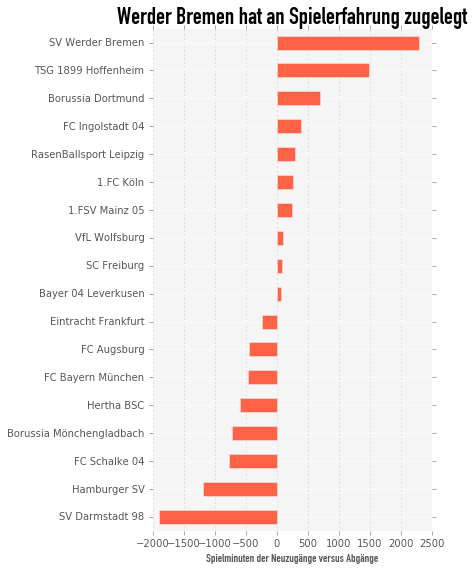

In [103]:
#Experience

fig, ax = plt.subplots(figsize =(5,9))

#Font
csfont = {'fontname':'DIN Condensed'}

Transferbilanz['Total-Spiel-Differenz'].sort_values(ascending=True).plot(kind='barh', ax = ax, legend=False, color=['Tomato'])
plt.axes

ax.set_axis_bgcolor("WhiteSmoke")

ax.set_ylabel('')

ax.xaxis.grid(color='darkgrey', linestyle=':', linewidth=0.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tick_params(
    #axis='x',
    top='off',
    which='off',
    left='off',
    right='off',
    bottom='off',
    labeltop='off',
    labelbottom='off')

#labelling, getting rid of boarders
ax.set_xlabel('Spielminuten der Neuzugänge versus Abgänge', **csfont, fontsize=12)
ax.set_title("Werder Bremen hat an Spielerfahrung zugelegt", **csfont, fontsize=24)

#Showing Median
#median = Transferbilanz['Total-Spiel-Differenz'].median()
#ax.plot([median, median], [0, 10], c='black', linestyle=':')
#ax.annotate(s='Durchschnitt aller Vereine', xy=(-1300,4), color='black')

ax.set_axisbelow(True)
plt.savefig('Erfahrung.pdf', transparent=True, bbox_inches='tight')
plt.savefig('Erfahrung.png', transparent=False, bbox_inches='tight')

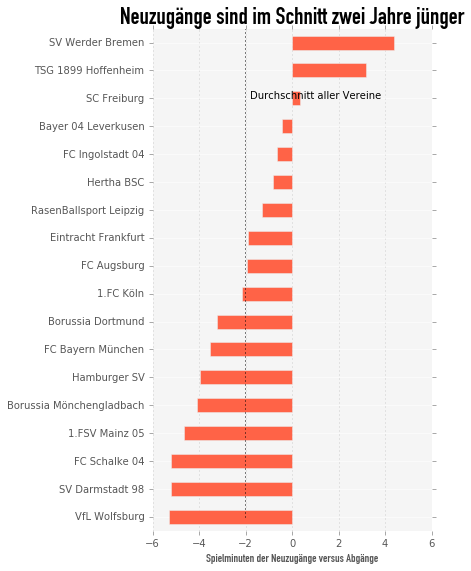

In [104]:
#Age

fig, ax = plt.subplots(figsize =(5,9))

#Font
csfont = {'fontname':'DIN Condensed'}

Transferbilanz['Alters-Differenz'].sort_values(ascending=True).plot(kind='barh', ax = ax, legend=False, color=['Tomato'])
plt.axes

ax.set_axis_bgcolor("WhiteSmoke")

ax.set_ylabel('')

ax.xaxis.grid(color='darkgrey', linestyle=':', linewidth=0.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tick_params(
    #axis='x',
    top='off',
    which='off',
    left='off',
    right='off',
    bottom='off',
    labeltop='off',
    labelbottom='off')

#labelling, getting rid of boarders
ax.set_xlabel('Spielminuten der Neuzugänge versus Abgänge', **csfont, fontsize=12)
ax.set_title("Neuzugänge sind im Schnitt zwei Jahre jünger", **csfont, fontsize=24)

#Showing Median
median = Transferbilanz['Alters-Differenz'].median()
ax.plot([median, median], [0, 18], c='black', linestyle=':')
ax.annotate(s='Durchschnitt aller Vereine', xy=(-1.8,15), color='black')

ax.set_axisbelow(True)
plt.savefig('Alter.pdf', transparent=True, bbox_inches='tight')
plt.savefig('Alter.png', transparent=False, bbox_inches='tight')

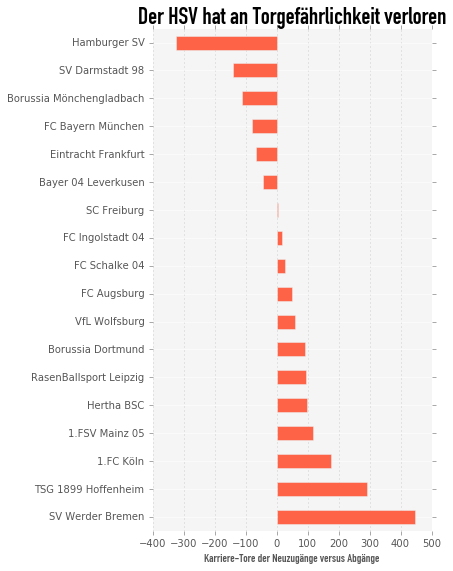

In [105]:
#Tore

fig, ax = plt.subplots(figsize =(5,9))

#Font
csfont = {'fontname':'DIN Condensed'}

Transferbilanz['Tore-Differenz'].sort_values(ascending=False).plot(kind='barh', ax = ax, legend=False, color=['Tomato'])
plt.axes

ax.set_axis_bgcolor("WhiteSmoke")

ax.set_ylabel('')

ax.xaxis.grid(color='darkgrey', linestyle=':', linewidth=0.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tick_params(
    #axis='x',
    top='off',
    which='off',
    left='off',
    right='off',
    bottom='off',
    labeltop='off',
    labelbottom='off')

#labelling, getting rid of boarders
ax.set_xlabel('Karriere-Tore der Neuzugänge versus Abgänge', **csfont, fontsize=12)
ax.set_title("Der HSV hat an Torgefährlichkeit verloren", **csfont, fontsize=24)

#Showing Median
#median = Transferbilanz['Tore-Differenz'].median()
#ax.plot([median, median], [-4, 10], c='black', linestyle=':')
#ax.annotate(s='Durchschnitt aller Vereine', xy=(-190, 5), color='black')

ax.set_axisbelow(True)
plt.savefig('Tore.pdf', transparent=False, bbox_inches='tight')
plt.savefig('Tore.png', transparent=False, bbox_inches='tight')

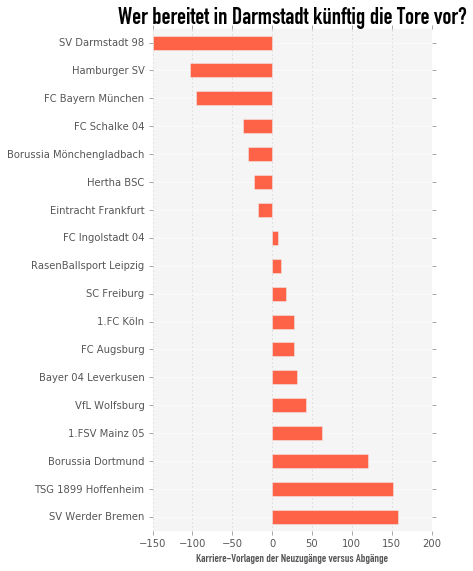

In [106]:
fig, ax = plt.subplots(figsize =(5,9))

#Font
csfont = {'fontname':'DIN Condensed'}

Transferbilanz['Vorlagen-Differenz'].sort_values(ascending=False).plot(kind='barh', ax = ax, legend=False, color=['Tomato'])
plt.axes

ax.set_axis_bgcolor("WhiteSmoke")

ax.set_ylabel('')

ax.xaxis.grid(color='darkgrey', linestyle=':', linewidth=0.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tick_params(
    #axis='x',
    top='off',
    which='off',
    left='off',
    right='off',
    bottom='off',
    labeltop='off',
    labelbottom='off')

#labelling, getting rid of boarders
ax.set_xlabel('Karriere-Vorlagen der Neuzugänge versus Abgänge', **csfont, fontsize=12)
ax.set_title("Wer bereitet in Darmstadt künftig die Tore vor?", **csfont, fontsize=24)

ax.set_axisbelow(True)

plt.savefig('Vorlagen.pdf', transparent=True, bbox_inches='tight')
plt.savefig('Vorlagen.png', transparent=True, bbox_inches='tight')

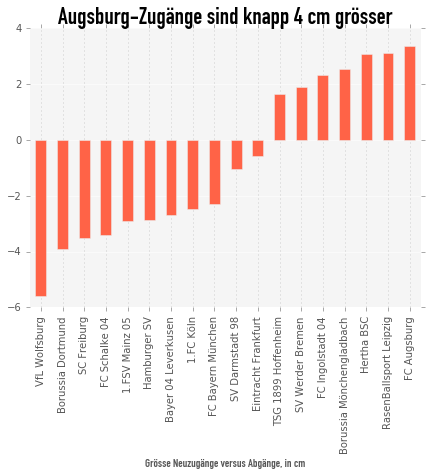

In [107]:
fig, ax = plt.subplots(figsize =(7,5))

#Font
csfont = {'fontname':'DIN Condensed'}

Transferbilanz['Grösse-Differenz'].sort_values(ascending=True).plot(kind='bar', ax = ax, legend=False, color=['Tomato'])
plt.axes

ax.set_axis_bgcolor("WhiteSmoke")

ax.set_ylabel('')

ax.xaxis.grid(color='darkgrey', linestyle=':', linewidth=0.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tick_params(
    #axis='x',
    top='off',
    which='off',
    left='off',
    right='off',
    bottom='off',
    labeltop='off',
    labelbottom='off')

#labelling, getting rid of boarders
ax.set_xlabel('Grösse Neuzugänge versus Abgänge, in cm', **csfont, fontsize=12)
ax.set_title("Augsburg-Zugänge sind knapp 4 cm grösser", **csfont, fontsize=24)

#Showing Median
#median = Transferbilanz['Grösse-Differenz'].median()
#ax.plot([median, median], [-4, 5], c='black', linestyle=':')
#ax.annotate(s='Durchschnitt aller Vereine', xy=(0.4,1.1), color='black')

ax.set_axisbelow(True)

plt.savefig('Groesse.pdf', transparent=True, bbox_inches='tight')
plt.savefig('Groesse.png', transparent=True, bbox_inches='tight')

In [108]:
pd.DataFrame(df_SL_transfers).to_csv(datestring + '16_17_BL_Transfers.csv', index=False)

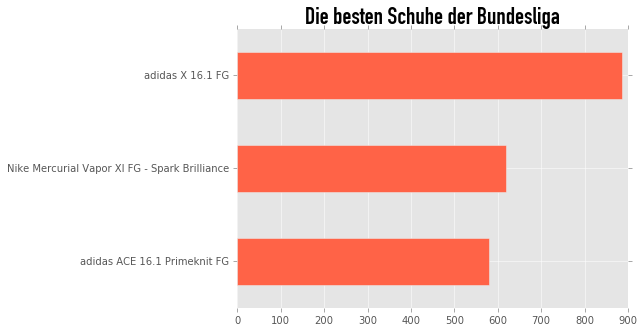

In [109]:
csfont = {'fontname':'DIN Condensed'}

fig, ax = plt.subplots(figsize =(7,5))
df_SL_transfers.groupby('Ausrüster')['Tore'].sum().sort_values(ascending=True).tail(3).plot(kind='barh', ax=ax, color=['Tomato'])
ax.set_ylabel('')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_title("Die besten Schuhe der Bundesliga", **csfont, fontsize=24)

plt.savefig('Schuhe.pdf', transparent=False, bbox_inches='tight')
plt.savefig('Schuhe.png', transparent=False, bbox_inches='tight')

In [110]:
df_SL_transfers[df_SL_transfers['Ausrüster'] == 'adidas X 16.1 FG']

,Agent,Alter,Ausrüster,Gelb-Rote Karten,Gelbe Karten,Grösse,Im Team seit,Marktwert,Minuten,Name,Position,Rote Karten,Tore,Total Spiele,URL,Verein,Vorlagen,Wechsel von,*Wechsel von*,Alle Karten
53,GOODWIN SPORTMANAGEMENT,21,adidas X 16.1 FG,0,2,193.0,26.07.2016,,<function Minuten at 0x10d8660d0>,Ivan Lucic,Torwart,0,2,78,http://www.transfermarkt.ch/ivan-lucic/profil/...,Bristol City,0,Bayern München,FC Bayern München,2
55,Haspel Sportconsulting,25,adidas X 16.1 FG,0,26,184.0,22.07.2016,,<function Minuten at 0x10d8660d0>,André Schürrle,Sturm - Linksaußen,1,94,326,http://www.transfermarkt.ch/andre-schurrle/pro...,Borussia Dortmund,37,VfL Wolfsburg,VfL Wolfsburg,27
82,Soccerdreamz Sportconsulting,32,adidas X 16.1 FG,0,24,196.0,01.07.2016,,<function Minuten at 0x10d8660d0>,Dario Kresic,Torwart,0,0,181,http://www.transfermarkt.ch/dario-kresic/profi...,Unbekannt,0,Bay. Leverkusen,Bayer 04 Leverkusen,24
87,ISMG International Sports Management GmbH,23,adidas X 16.1 FG,0,22,199.0,01.07.2016,,<function Minuten at 0x10d8660d0>,Jannik Vestergaard,Abwehr - Innenverteidiger,0,15,163,http://www.transfermarkt.ch/jannik-vestergaard...,Borussia Mönchengladbach,4,Werder Bremen,Werder Bremen,22
93,SportsTotal,23,adidas X 16.1 FG,0,16,181.0,01.07.2015,,<function Minuten at 0x10d8660d0>,Josip Drmic,Sturm - Mittelstürmer,1,70,203,http://www.transfermarkt.ch/josip-drmic/profil...,Borussia Mönchengladbach,15,Hamburger SV,Hamburger SV,17
97,Drazan Gilja,23,adidas X 16.1 FG,0,9,185.0,01.07.2016,,<function Minuten at 0x10d8660d0>,Branimir Hrgota,Sturm - Mittelstürmer,0,49,136,http://www.transfermarkt.ch/branimir-hrgota/pr...,Eintracht Frankfurt,13,Bor. M'gladbach,Borussia Mönchengladbach,9
103,World in Motion,23,adidas X 16.1 FG,1,47,184.0,01.09.2010,,<function Minuten at 0x10d8660d0>,Martin Hinteregger,Abwehr - Innenverteidiger,2,26,259,http://www.transfermarkt.ch/martin-hinteregger...,Red Bull Salzburg,10,Bor. M'gladbach,Borussia Mönchengladbach,50
117,Siebert & Backs Fussballmanagement GmbH,26,adidas X 16.1 FG,1,52,182.0,01.07.2016,,<function Minuten at 0x10d8660d0>,Marco Höger,Mittelfeld - Zentrales Mittelfeld,1,27,257,http://www.transfermarkt.ch/marco-hoger/profil...,1.FC Köln,24,FC Schalke 04,FC Schalke 04,54
131,Rechtsanwalt Rubinstein,25,adidas X 16.1 FG,1,36,180.0,01.07.2015,,<function Minuten at 0x10d8660d0>,Maximilian Beister,Sturm - Rechtsaußen,1,58,198,http://www.transfermarkt.ch/maximilian-beister...,1.FSV Mainz 05,31,1860 München,1860 München,38
167,Soccertalk GmbH,28,adidas X 16.1 FG,0,24,183.0,01.07.2016,,<function Minuten at 0x10d8660d0>,Artjoms Rudnevs,Sturm - Mittelstürmer,0,110,268,http://www.transfermarkt.ch/artjoms-rudnevs/pr...,1.FC Köln,24,Hamburger SV,Hamburger SV,24


In [111]:
df_SL_transfers.head(1)

,Agent,Alter,Ausrüster,Gelb-Rote Karten,Gelbe Karten,Grösse,Im Team seit,Marktwert,Minuten,Name,Position,Rote Karten,Tore,Total Spiele,URL,Verein,Vorlagen,Wechsel von,*Wechsel von*,Alle Karten
0,GM FOOT,29,Nike Magista Opus FG - Spark Brilliance,0,71,190.0,15.07.2016,,<function Minuten at 0x10d8660d0>,Medhi Benatia,Abwehr - Innenverteidiger,1,17,271,http://www.transfermarkt.ch/medhi-benatia/prof...,Juventus Turin,6,FC Bayern München,FC FC Bayern München,72


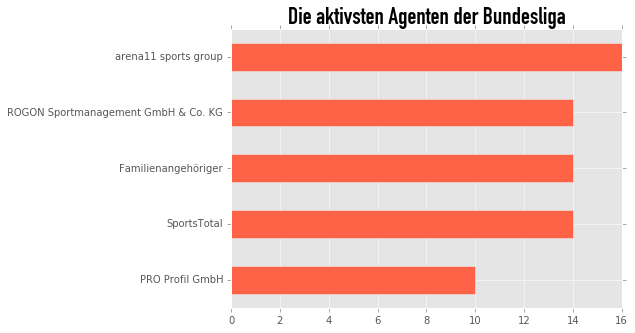

In [112]:
fig, ax = plt.subplots(figsize =(7,5))
df_SL_transfers['Agent'].value_counts().sort_values(ascending=True).tail(5).plot(kind='barh', ax=ax, color=['Tomato'])
ax.set_title("Die aktivsten Agenten der Bundesliga", **csfont, fontsize=24)
plt.savefig('Agenten.pdf', transparent=False, bbox_inches='tight')
plt.savefig('Agenten.png', transparent=False, bbox_inches='tight')

In [113]:
df_SL_transfers

,Agent,Alter,Ausrüster,Gelb-Rote Karten,Gelbe Karten,Grösse,Im Team seit,Marktwert,Minuten,Name,Position,Rote Karten,Tore,Total Spiele,URL,Verein,Vorlagen,Wechsel von,*Wechsel von*,Alle Karten
0,GM FOOT,29,Nike Magista Opus FG - Spark Brilliance,0,71,190.0,15.07.2016,,<function Minuten at 0x10d8660d0>,Medhi Benatia,Abwehr - Innenverteidiger,1,17,271,http://www.transfermarkt.ch/medhi-benatia/prof...,Juventus Turin,6,FC Bayern München,FC FC Bayern München,72
1,Soccer-Concept AG,19,None,0,6,NaN,02.07.2016,None,<function Minuten at 0x10d8660d0>,Andrejs Ciganiks,Mittelfeld - Linksaußen,0,19,66,http://www.transfermarkt.ch/andrejs-ciganiks/p...,FC Viktoria Köln,3,Bayer 04 Leverkusen,Bayer 04 Leverkusen,6
2,Schwarzer & Rummenigge Sports Management GmbH ...,19,None,0,8,175.0,12.07.2016,None,<function Minuten at 0x10d8660d0>,Patrik Dzalto,Sturm - Mittelstürmer,0,43,93,http://www.transfermarkt.ch/patrik-dzalto/prof...,SSV Jahn Regensburg,17,Bayer 04 Leverkusen,Bayer 04 Leverkusen,8
3,Rummenigge Sport Marketing GmbH,19,None,0,5,184.0,06.07.2016,,<function Minuten at 0x10d8660d0>,Marc Brasnic,Sturm - Mittelstürmer,0,64,97,http://www.transfermarkt.ch/marc-brasnic/profi...,SC Fortuna Köln,16,Bayer 04 Leverkusen,Bayer 04 Leverkusen,5
5,Sports 11 GmbH,20,None,0,16,181.0,04.07.2016,,<function Minuten at 0x10d8660d0>,Marlon Frey,Mittelfeld - Defensives Mittelfeld,1,18,113,http://www.transfermarkt.ch/marlon-frey/profil...,1.FC Kaiserslautern,7,Bayer 04 Leverkusen,Bayer 04 Leverkusen,17
6,Haspel Sportconsulting,19,None,0,14,182.0,17.07.2016,,<function Minuten at 0x10d8660d0>,Robin Becker,Abwehr - Rechter Verteidiger,0,3,77,http://www.transfermarkt.ch/robin-becker/profi...,1.FC Heidenheim 1846,3,Bayer 04 Leverkusen,Bayer 04 Leverkusen,14
9,Sports Entertainment Group,21,Nike Tiempo Legend VI FG - Spark Brilliance,0,5,187.0,01.07.2016,,<function Minuten at 0x10d8660d0>,Marius Gersbeck,Torwart,1,0,65,http://www.transfermarkt.ch/marius-gersbeck/pr...,VfL Osnabrück,0,Hertha BSC,Hertha BSC,6
11,Together For You,19,Nike Hypervenom Phantom II FG - Radiant Reveal,0,6,182.0,22.07.2016,None,<function Minuten at 0x10d8660d0>,Borja Mayoral,Sturm - Mittelstürmer,0,32,58,http://www.transfermarkt.ch/borja-mayoral/prof...,VfL Wolfsburg,7,Real Madrid,Real Madrid,6
12,Familienangehöriger,23,None,0,3,194.0,01.07.2016,,<function Minuten at 0x10d8660d0>,Patrick Drewes,Torwart,0,0,150,http://www.transfermarkt.ch/patrick-drewes/pro...,Preußen Münster,0,VfL Wolfsburg,VfL Wolfsburg,3
13,Sports Entertainment Group,21,Nike Tiempo Legend VI FG - Spark Brilliance,1,11,190.0,01.07.2016,,<function Minuten at 0x10d8660d0>,Moritz Sprenger,Abwehr - Innenverteidiger,0,3,121,http://www.transfermarkt.ch/moritz-sprenger/pr...,1.FC Magdeburg,1,VfL Wolfsburg,VfL Wolfsburg,12


In [114]:
df_SL_transfers[df_SL_transfers['Agent'] == 'arena11 sports group']

,Agent,Alter,Ausrüster,Gelb-Rote Karten,Gelbe Karten,Grösse,Im Team seit,Marktwert,Minuten,Name,Position,Rote Karten,Tore,Total Spiele,URL,Verein,Vorlagen,Wechsel von,*Wechsel von*,Alle Karten
71,arena11 sports group,23,Nike Mercurial Superfly V FG - Spark Brilliance,1,12,185.0,01.07.2016,,<function Minuten at 0x10d8660d0>,Danny da Costa,Abwehr - Rechter Verteidiger,0,4,183,http://www.transfermarkt.ch/danny-da-costa/pro...,Bayer 04 Leverkusen,13,FC Ingolstadt,FC Ingolstadt,13
105,arena11 sports group,33,adidas ACE 16.1 Primeknit FG,0,65,198.0,01.07.2016,,<function Minuten at 0x10d8660d0>,Naldo,Abwehr - Innenverteidiger,2,56,423,http://www.transfermarkt.ch/naldo/profil/spiel...,FC Schalke 04,19,VfL Wolfsburg,VfL Wolfsburg,67
110,arena11 sports group,18,None,1,18,178.0,01.07.2016,,<function Minuten at 0x10d8660d0>,Christian Rubio Sivodedov,Mittelfeld - Zentrales Mittelfeld,0,18,99,http://www.transfermarkt.ch/christian-rubio-si...,FC Schalke 04,4,Schalke 04 U19,Schalke 04 U19,19
118,arena11 sports group,20,adidas ACE 16.1 Primeknit FG,0,16,190.0,01.07.2016,,<function Minuten at 0x10d8660d0>,Marvin Friedrich,Abwehr - Innenverteidiger,0,12,137,http://www.transfermarkt.ch/marvin-friedrich/p...,FC Augsburg,9,FC Schalke 04,FC Schalke 04,16
126,arena11 sports group,21,Nike Mercurial Vapor XI FG - Spark Brilliance,0,3,183.0,01.07.2016,,<function Minuten at 0x10d8660d0>,Gerrit Holtmann,Sturm - Linksaußen,0,27,92,http://www.transfermarkt.ch/gerrit-holtmann/pr...,1.FSV Mainz 05,14,E. Braunschweig,E. Braunschweig,3
143,arena11 sports group,31,None,0,60,188.0,01.07.2016,,<function Minuten at 0x10d8660d0>,Vedad Ibisevic,Sturm - Mittelstürmer,8,139,366,http://www.transfermarkt.ch/vedad-ibisevic/pro...,Hertha BSC,48,VfB Stuttgart,VfB Stuttgart,68
175,arena11 sports group,24,Nike Mercurial Vapor XI FG - Spark Brilliance,1,42,194.0,01.07.2016,,<function Minuten at 0x10d8660d0>,Kevin Vogt,Mittelfeld - Zentrales Mittelfeld,3,15,233,http://www.transfermarkt.ch/kevin-vogt/profil/...,TSG 1899 Hoffenheim,13,1.FC Köln,1.FC Köln,46
188,arena11 sports group,23,None,2,37,185.0,13.07.2016,,<function Minuten at 0x10d8660d0>,Kerem Demirbay,Mittelfeld - Offensives Mittelfeld,1,39,157,http://www.transfermarkt.ch/kerem-demirbay/pro...,TSG 1899 Hoffenheim,20,Hamburger SV,Hamburger SV,40
201,arena11 sports group,22,None,0,13,189.0,01.07.2016,,<function Minuten at 0x10d8660d0>,Hauke Wahl,Abwehr - Innenverteidiger,0,6,151,http://www.transfermarkt.ch/hauke-wahl/profil/...,FC Ingolstadt 04,0,SC Paderborn,SC Paderborn,13
215,arena11 sports group,25,Nike Mercurial Superfly V FG - Spark Brilliance,1,15,183.0,01.07.2016,,<function Minuten at 0x10d8660d0>,Georg Teigl,Abwehr - Rechter Verteidiger,2,24,209,http://www.transfermarkt.ch/georg-teigl/profil...,FC Augsburg,23,RB Leipzig,RasenBallsport Leipzig,18
